# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|████████████████████████████████████████████| 60.0K/60.0K [03:50<00:00, 260File/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

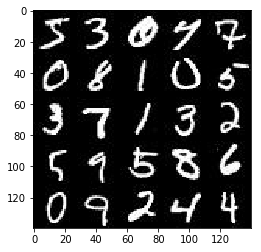

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

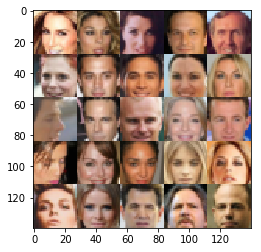

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [29]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape = (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape = (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [70]:
def leaky_relu(layer):
    alpha=0.2
    return tf.maximum(alpha * layer, layer)

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    dropout=0.8
    tf.report_uninitialized_variables()
    # TODO: Implement Function
    with tf.variable_scope( 'discriminator', reuse=reuse):  # finish this
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = leaky_relu(x1)
        relu1 = tf.nn.dropout(relu1, dropout)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        relu2 = tf.nn.dropout(relu2, dropout)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = leaky_relu(bn3)
        relu3 = tf.nn.dropout(relu3, dropout)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [72]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse_status = not is_train
    dropout=0.8
    with tf.variable_scope('generator', reuse=reuse_status):
        x1 = tf.layers.dense( z, 28*28*512)
        x1 = tf.reshape(x1, (-1, 28, 28, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = leaky_relu(x1)
        x1 = tf.nn.dropout(x1, dropout)
        # 4x4x512 now       
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = leaky_relu(x2)
        x2 = tf.nn.dropout(x2, dropout)
        # 8x8x256 now        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = leaky_relu(x3)
        x3 = tf.nn.dropout(x3, dropout)
        # 16x16x128 now       
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 32x32x3 now
        #logits = tf.image.resize_images(logits, (28,28))
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [73]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real * (1 - smooth))))

    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [74]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    vars = tf.trainable_variables()
    d_vars = [var for var in vars if var.name.startswith('discriminator')]
    g_vars = [var for var in vars if var.name.startswith('generator')]
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)

    with tf.control_dependencies(g_update_ops):
        g_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
    return d_train, g_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [75]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [76]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 20
    show_every = 100
    
    input_real, input_z, ph_learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3],  z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
  
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z:batch_z, ph_learning_rate:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z:batch_z, ph_learning_rate:learning_rate})
            
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, ph_learning_rate: learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, ph_learning_rate: learning_rate})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.0034... Generator Loss: 0.2097
Epoch 1/2... Discriminator Loss: 1.8536... Generator Loss: 0.3833
Epoch 1/2... Discriminator Loss: 1.8545... Generator Loss: 0.5020
Epoch 1/2... Discriminator Loss: 1.4965... Generator Loss: 0.5299
Epoch 1/2... Discriminator Loss: 1.4240... Generator Loss: 0.8929


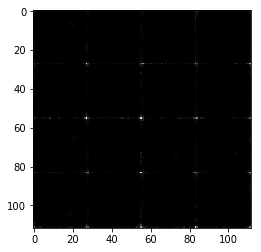

Epoch 1/2... Discriminator Loss: 1.3962... Generator Loss: 0.6779
Epoch 1/2... Discriminator Loss: 1.7075... Generator Loss: 0.3412
Epoch 1/2... Discriminator Loss: 1.5141... Generator Loss: 0.8295
Epoch 1/2... Discriminator Loss: 2.0003... Generator Loss: 0.5072
Epoch 1/2... Discriminator Loss: 1.5444... Generator Loss: 0.6299


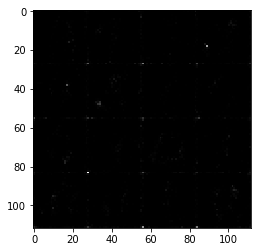

Epoch 1/2... Discriminator Loss: 1.1537... Generator Loss: 0.8541
Epoch 1/2... Discriminator Loss: 1.3432... Generator Loss: 0.9065
Epoch 1/2... Discriminator Loss: 1.4526... Generator Loss: 0.7518
Epoch 1/2... Discriminator Loss: 1.7220... Generator Loss: 0.4551
Epoch 1/2... Discriminator Loss: 1.4338... Generator Loss: 0.5382


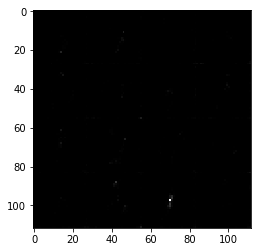

Epoch 1/2... Discriminator Loss: 1.4344... Generator Loss: 0.5341
Epoch 1/2... Discriminator Loss: 1.3841... Generator Loss: 0.6390
Epoch 1/2... Discriminator Loss: 1.4180... Generator Loss: 0.7028
Epoch 1/2... Discriminator Loss: 1.2688... Generator Loss: 0.6464
Epoch 1/2... Discriminator Loss: 1.5323... Generator Loss: 0.5087


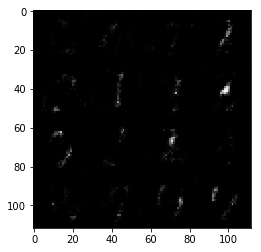

Epoch 1/2... Discriminator Loss: 1.3913... Generator Loss: 0.5065
Epoch 1/2... Discriminator Loss: 1.7432... Generator Loss: 0.5152
Epoch 1/2... Discriminator Loss: 1.3938... Generator Loss: 0.8431
Epoch 1/2... Discriminator Loss: 1.3864... Generator Loss: 0.6290
Epoch 1/2... Discriminator Loss: 1.4172... Generator Loss: 0.4470


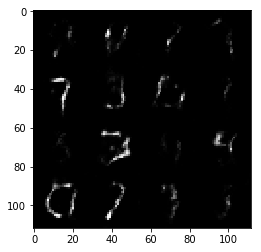

Epoch 1/2... Discriminator Loss: 1.3772... Generator Loss: 0.5122
Epoch 1/2... Discriminator Loss: 1.2995... Generator Loss: 0.6390
Epoch 1/2... Discriminator Loss: 1.5194... Generator Loss: 0.6414
Epoch 1/2... Discriminator Loss: 1.2714... Generator Loss: 0.7154
Epoch 1/2... Discriminator Loss: 1.4769... Generator Loss: 0.6650


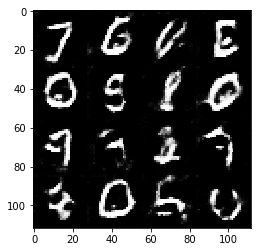

Epoch 1/2... Discriminator Loss: 1.5125... Generator Loss: 0.6157
Epoch 1/2... Discriminator Loss: 1.1607... Generator Loss: 0.7845
Epoch 1/2... Discriminator Loss: 1.2030... Generator Loss: 0.7342
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 0.7720
Epoch 1/2... Discriminator Loss: 1.3096... Generator Loss: 0.7899


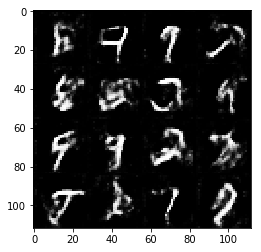

Epoch 1/2... Discriminator Loss: 1.5066... Generator Loss: 0.5403
Epoch 1/2... Discriminator Loss: 1.4559... Generator Loss: 0.5392
Epoch 1/2... Discriminator Loss: 1.2317... Generator Loss: 0.9243
Epoch 1/2... Discriminator Loss: 1.2577... Generator Loss: 0.8371
Epoch 1/2... Discriminator Loss: 1.4064... Generator Loss: 0.7367


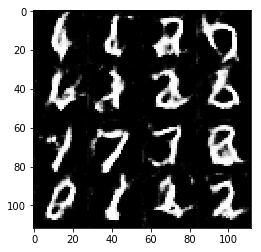

Epoch 1/2... Discriminator Loss: 1.3019... Generator Loss: 0.9757
Epoch 1/2... Discriminator Loss: 1.2057... Generator Loss: 0.6963
Epoch 1/2... Discriminator Loss: 1.2970... Generator Loss: 0.8879
Epoch 1/2... Discriminator Loss: 1.5758... Generator Loss: 0.4849
Epoch 1/2... Discriminator Loss: 1.2370... Generator Loss: 0.6452


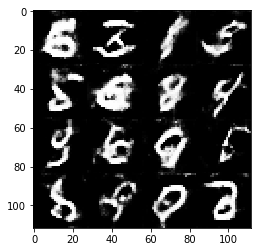

Epoch 1/2... Discriminator Loss: 1.2231... Generator Loss: 0.7650
Epoch 1/2... Discriminator Loss: 1.5662... Generator Loss: 0.3849
Epoch 1/2... Discriminator Loss: 1.2195... Generator Loss: 0.7263
Epoch 1/2... Discriminator Loss: 1.1795... Generator Loss: 0.8357
Epoch 1/2... Discriminator Loss: 1.7258... Generator Loss: 0.2443


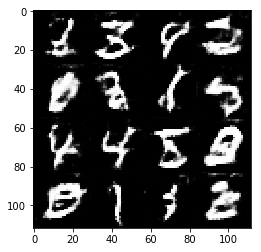

Epoch 1/2... Discriminator Loss: 1.0861... Generator Loss: 0.7407
Epoch 1/2... Discriminator Loss: 1.4095... Generator Loss: 0.6003
Epoch 1/2... Discriminator Loss: 1.0065... Generator Loss: 1.0875
Epoch 1/2... Discriminator Loss: 1.3276... Generator Loss: 0.7332
Epoch 1/2... Discriminator Loss: 1.4494... Generator Loss: 0.4397


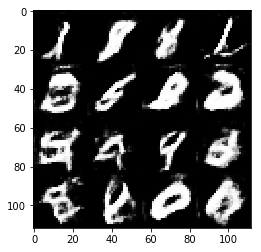

Epoch 1/2... Discriminator Loss: 1.1506... Generator Loss: 0.9922
Epoch 1/2... Discriminator Loss: 1.5391... Generator Loss: 0.3719
Epoch 1/2... Discriminator Loss: 1.0987... Generator Loss: 1.1658
Epoch 1/2... Discriminator Loss: 1.0915... Generator Loss: 0.8952
Epoch 1/2... Discriminator Loss: 1.0693... Generator Loss: 0.9817


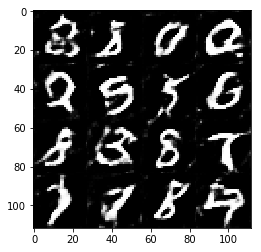

Epoch 1/2... Discriminator Loss: 1.1670... Generator Loss: 0.7159
Epoch 1/2... Discriminator Loss: 1.1215... Generator Loss: 0.6952
Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 1.4794
Epoch 1/2... Discriminator Loss: 0.9626... Generator Loss: 0.7699
Epoch 1/2... Discriminator Loss: 0.9903... Generator Loss: 0.9049


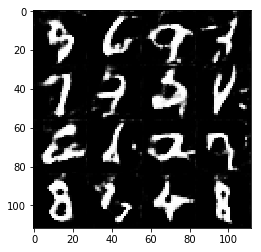

Epoch 1/2... Discriminator Loss: 1.4061... Generator Loss: 0.4026
Epoch 1/2... Discriminator Loss: 1.1659... Generator Loss: 1.3920
Epoch 1/2... Discriminator Loss: 1.6213... Generator Loss: 0.4604
Epoch 1/2... Discriminator Loss: 1.3244... Generator Loss: 0.4462
Epoch 1/2... Discriminator Loss: 1.2836... Generator Loss: 0.5551


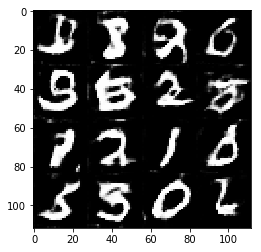

Epoch 1/2... Discriminator Loss: 1.1923... Generator Loss: 0.6502
Epoch 1/2... Discriminator Loss: 1.1784... Generator Loss: 0.9232
Epoch 1/2... Discriminator Loss: 0.8056... Generator Loss: 0.9586
Epoch 1/2... Discriminator Loss: 1.3322... Generator Loss: 0.8212
Epoch 1/2... Discriminator Loss: 1.2981... Generator Loss: 0.8095


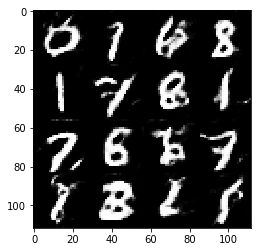

Epoch 1/2... Discriminator Loss: 0.9141... Generator Loss: 1.0437
Epoch 1/2... Discriminator Loss: 0.7619... Generator Loss: 1.2816
Epoch 1/2... Discriminator Loss: 1.0764... Generator Loss: 0.9489
Epoch 1/2... Discriminator Loss: 1.1282... Generator Loss: 1.0831
Epoch 1/2... Discriminator Loss: 1.1042... Generator Loss: 0.8868


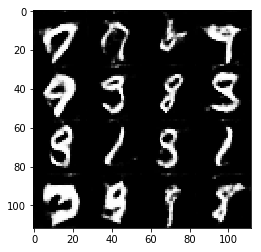

Epoch 1/2... Discriminator Loss: 1.3699... Generator Loss: 0.8459
Epoch 1/2... Discriminator Loss: 0.9734... Generator Loss: 1.5401
Epoch 1/2... Discriminator Loss: 0.8665... Generator Loss: 1.2326
Epoch 1/2... Discriminator Loss: 0.5010... Generator Loss: 1.5675
Epoch 1/2... Discriminator Loss: 0.8828... Generator Loss: 1.1246


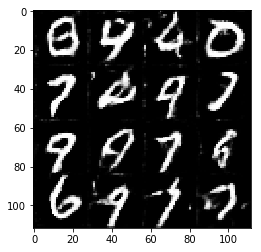

Epoch 1/2... Discriminator Loss: 1.3132... Generator Loss: 0.7646
Epoch 1/2... Discriminator Loss: 1.3485... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 1.4423... Generator Loss: 0.4340
Epoch 1/2... Discriminator Loss: 1.0632... Generator Loss: 0.8229
Epoch 1/2... Discriminator Loss: 0.8912... Generator Loss: 1.5062


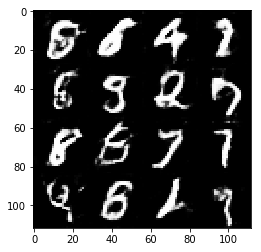

Epoch 1/2... Discriminator Loss: 0.9956... Generator Loss: 0.8757
Epoch 1/2... Discriminator Loss: 1.0542... Generator Loss: 0.9730
Epoch 1/2... Discriminator Loss: 1.4597... Generator Loss: 0.5228
Epoch 2/2... Discriminator Loss: 1.0123... Generator Loss: 0.8217
Epoch 2/2... Discriminator Loss: 0.8561... Generator Loss: 1.7284


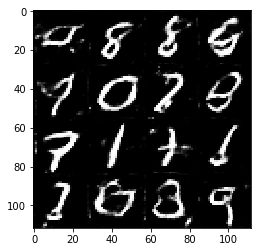

Epoch 2/2... Discriminator Loss: 0.8820... Generator Loss: 0.8627
Epoch 2/2... Discriminator Loss: 1.3340... Generator Loss: 0.9052
Epoch 2/2... Discriminator Loss: 1.1745... Generator Loss: 1.1487
Epoch 2/2... Discriminator Loss: 1.0672... Generator Loss: 0.9676
Epoch 2/2... Discriminator Loss: 1.3384... Generator Loss: 1.1120


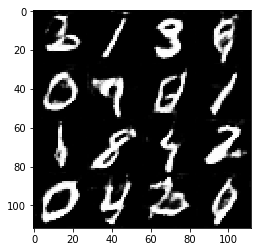

Epoch 2/2... Discriminator Loss: 0.8275... Generator Loss: 1.2679
Epoch 2/2... Discriminator Loss: 0.7555... Generator Loss: 1.7618
Epoch 2/2... Discriminator Loss: 0.6723... Generator Loss: 1.1963
Epoch 2/2... Discriminator Loss: 1.2019... Generator Loss: 1.1297
Epoch 2/2... Discriminator Loss: 1.1441... Generator Loss: 1.8694


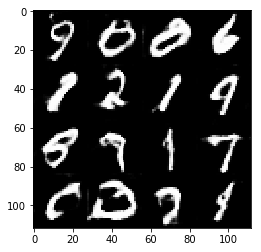

Epoch 2/2... Discriminator Loss: 0.8402... Generator Loss: 1.1735
Epoch 2/2... Discriminator Loss: 0.8733... Generator Loss: 1.4313
Epoch 2/2... Discriminator Loss: 0.8528... Generator Loss: 1.1442
Epoch 2/2... Discriminator Loss: 0.8249... Generator Loss: 1.2760
Epoch 2/2... Discriminator Loss: 0.9638... Generator Loss: 1.5962


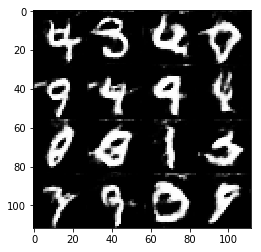

Epoch 2/2... Discriminator Loss: 1.0640... Generator Loss: 1.3119
Epoch 2/2... Discriminator Loss: 0.7041... Generator Loss: 1.5292
Epoch 2/2... Discriminator Loss: 0.7678... Generator Loss: 1.9670
Epoch 2/2... Discriminator Loss: 0.9716... Generator Loss: 0.9454
Epoch 2/2... Discriminator Loss: 0.4492... Generator Loss: 1.3870


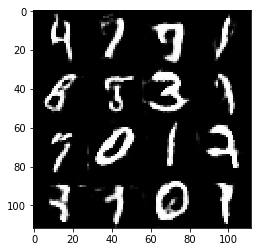

Epoch 2/2... Discriminator Loss: 0.8703... Generator Loss: 0.8518
Epoch 2/2... Discriminator Loss: 0.8109... Generator Loss: 0.9083
Epoch 2/2... Discriminator Loss: 1.2060... Generator Loss: 0.6055
Epoch 2/2... Discriminator Loss: 0.8568... Generator Loss: 1.3248
Epoch 2/2... Discriminator Loss: 1.1734... Generator Loss: 1.1992


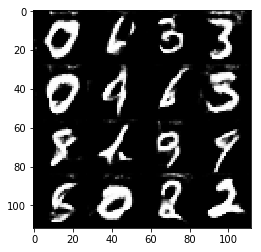

Epoch 2/2... Discriminator Loss: 0.8795... Generator Loss: 0.9640
Epoch 2/2... Discriminator Loss: 0.6634... Generator Loss: 2.0092
Epoch 2/2... Discriminator Loss: 0.6912... Generator Loss: 1.6692
Epoch 2/2... Discriminator Loss: 0.7642... Generator Loss: 1.4576
Epoch 2/2... Discriminator Loss: 0.8771... Generator Loss: 1.3544


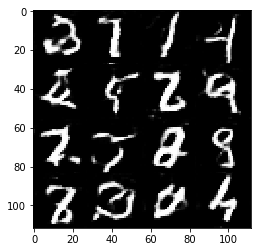

Epoch 2/2... Discriminator Loss: 1.0332... Generator Loss: 1.5124
Epoch 2/2... Discriminator Loss: 1.4109... Generator Loss: 0.9627
Epoch 2/2... Discriminator Loss: 1.1072... Generator Loss: 0.8911
Epoch 2/2... Discriminator Loss: 1.1042... Generator Loss: 1.1539
Epoch 2/2... Discriminator Loss: 0.7578... Generator Loss: 1.2902


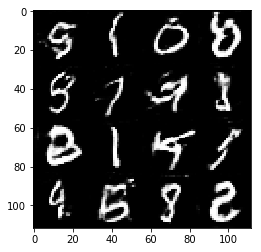

Epoch 2/2... Discriminator Loss: 1.1340... Generator Loss: 1.7741
Epoch 2/2... Discriminator Loss: 1.1794... Generator Loss: 0.8143
Epoch 2/2... Discriminator Loss: 0.9545... Generator Loss: 1.6475
Epoch 2/2... Discriminator Loss: 0.8849... Generator Loss: 0.9317
Epoch 2/2... Discriminator Loss: 1.9754... Generator Loss: 0.4309


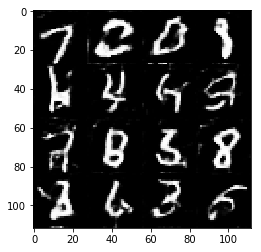

Epoch 2/2... Discriminator Loss: 1.2464... Generator Loss: 0.9302
Epoch 2/2... Discriminator Loss: 0.8202... Generator Loss: 1.1595
Epoch 2/2... Discriminator Loss: 1.3765... Generator Loss: 1.8906
Epoch 2/2... Discriminator Loss: 0.8365... Generator Loss: 1.2979
Epoch 2/2... Discriminator Loss: 0.6184... Generator Loss: 1.1934


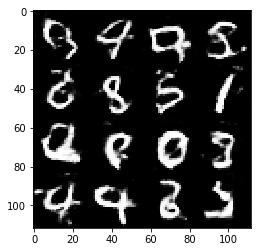

Epoch 2/2... Discriminator Loss: 0.8002... Generator Loss: 1.5863
Epoch 2/2... Discriminator Loss: 1.0235... Generator Loss: 1.0535
Epoch 2/2... Discriminator Loss: 1.6421... Generator Loss: 1.1059
Epoch 2/2... Discriminator Loss: 0.5619... Generator Loss: 1.6512
Epoch 2/2... Discriminator Loss: 0.8826... Generator Loss: 2.0450


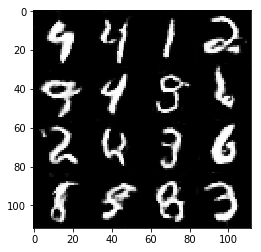

Epoch 2/2... Discriminator Loss: 0.9554... Generator Loss: 1.5313
Epoch 2/2... Discriminator Loss: 0.8667... Generator Loss: 1.3252
Epoch 2/2... Discriminator Loss: 0.4431... Generator Loss: 1.7668
Epoch 2/2... Discriminator Loss: 0.5973... Generator Loss: 1.4423
Epoch 2/2... Discriminator Loss: 0.9574... Generator Loss: 1.2751


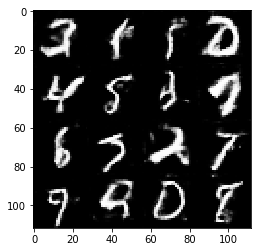

Epoch 2/2... Discriminator Loss: 0.8471... Generator Loss: 1.1675
Epoch 2/2... Discriminator Loss: 0.8223... Generator Loss: 1.1446
Epoch 2/2... Discriminator Loss: 0.6957... Generator Loss: 1.9802
Epoch 2/2... Discriminator Loss: 0.6333... Generator Loss: 2.0712
Epoch 2/2... Discriminator Loss: 0.7369... Generator Loss: 1.3286


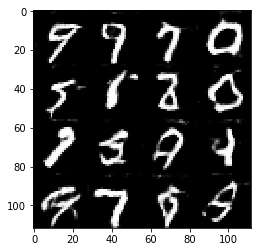

Epoch 2/2... Discriminator Loss: 0.8287... Generator Loss: 1.1675
Epoch 2/2... Discriminator Loss: 0.9139... Generator Loss: 1.1303
Epoch 2/2... Discriminator Loss: 0.6827... Generator Loss: 1.0919
Epoch 2/2... Discriminator Loss: 1.0945... Generator Loss: 1.0225
Epoch 2/2... Discriminator Loss: 1.0787... Generator Loss: 1.0766


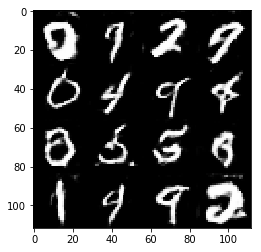

Epoch 2/2... Discriminator Loss: 0.6673... Generator Loss: 0.7866
Epoch 2/2... Discriminator Loss: 0.8758... Generator Loss: 1.7482
Epoch 2/2... Discriminator Loss: 0.8136... Generator Loss: 1.4087
Epoch 2/2... Discriminator Loss: 0.9123... Generator Loss: 1.1253
Epoch 2/2... Discriminator Loss: 0.5931... Generator Loss: 1.9524


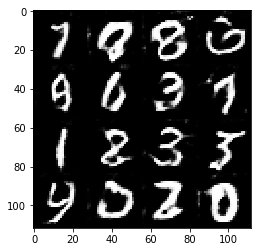

Epoch 2/2... Discriminator Loss: 0.5404... Generator Loss: 2.9343
Epoch 2/2... Discriminator Loss: 0.4858... Generator Loss: 1.4625
Epoch 2/2... Discriminator Loss: 0.8951... Generator Loss: 2.5674
Epoch 2/2... Discriminator Loss: 0.6091... Generator Loss: 1.2218
Epoch 2/2... Discriminator Loss: 1.7342... Generator Loss: 0.4906


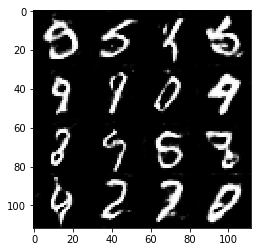

Epoch 2/2... Discriminator Loss: 0.8723... Generator Loss: 2.9115
Epoch 2/2... Discriminator Loss: 0.9409... Generator Loss: 1.2264
Epoch 2/2... Discriminator Loss: 1.4013... Generator Loss: 0.8541
Epoch 2/2... Discriminator Loss: 0.8365... Generator Loss: 1.1246
Epoch 2/2... Discriminator Loss: 1.4040... Generator Loss: 0.9763


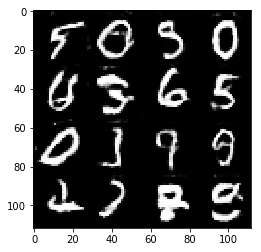

Epoch 2/2... Discriminator Loss: 0.6022... Generator Loss: 1.6258
Epoch 2/2... Discriminator Loss: 0.3811... Generator Loss: 1.4511
Epoch 2/2... Discriminator Loss: 0.8659... Generator Loss: 0.9050
Epoch 2/2... Discriminator Loss: 0.5085... Generator Loss: 2.1928
Epoch 2/2... Discriminator Loss: 0.7436... Generator Loss: 1.3903


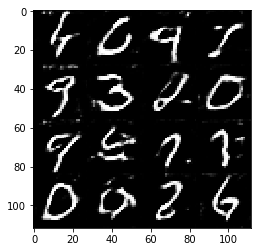

Epoch 2/2... Discriminator Loss: 0.8400... Generator Loss: 0.9355
Epoch 2/2... Discriminator Loss: 1.3022... Generator Loss: 0.9868
Epoch 2/2... Discriminator Loss: 1.7098... Generator Loss: 0.5072
Epoch 2/2... Discriminator Loss: 0.9867... Generator Loss: 1.0434
Epoch 2/2... Discriminator Loss: 0.8841... Generator Loss: 2.0478


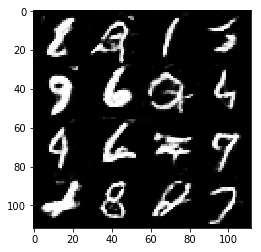

Epoch 2/2... Discriminator Loss: 0.9676... Generator Loss: 1.0664
Epoch 2/2... Discriminator Loss: 1.1380... Generator Loss: 0.7325


In [77]:
batch_size = 32
z_dim = 128
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1245... Generator Loss: 0.3738
Epoch 1/1... Discriminator Loss: 1.2198... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.6136... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 0.8626... Generator Loss: 1.4792


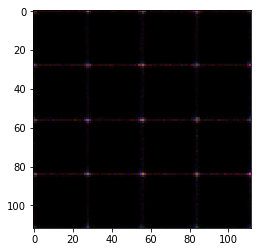

Epoch 1/1... Discriminator Loss: 0.6391... Generator Loss: 1.6235
Epoch 1/1... Discriminator Loss: 0.3496... Generator Loss: 1.6864
Epoch 1/1... Discriminator Loss: 0.6006... Generator Loss: 1.1474
Epoch 1/1... Discriminator Loss: 0.6910... Generator Loss: 1.4969
Epoch 1/1... Discriminator Loss: 0.7296... Generator Loss: 0.9759


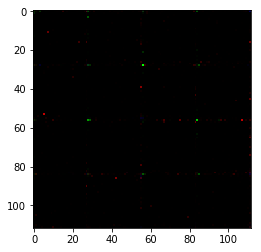

Epoch 1/1... Discriminator Loss: 0.8121... Generator Loss: 1.0641
Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 1.0078
Epoch 1/1... Discriminator Loss: 0.8318... Generator Loss: 0.9378
Epoch 1/1... Discriminator Loss: 0.5001... Generator Loss: 2.0277
Epoch 1/1... Discriminator Loss: 0.4849... Generator Loss: 2.0682


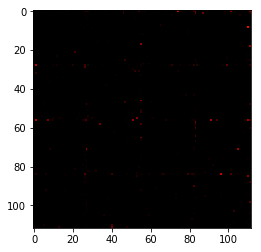

Epoch 1/1... Discriminator Loss: 0.9552... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 0.6440... Generator Loss: 2.2936
Epoch 1/1... Discriminator Loss: 0.8009... Generator Loss: 0.9885
Epoch 1/1... Discriminator Loss: 0.3451... Generator Loss: 3.3202
Epoch 1/1... Discriminator Loss: 0.9543... Generator Loss: 1.2748


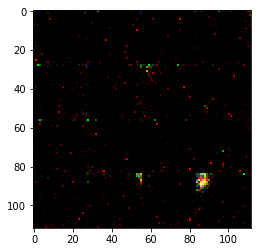

Epoch 1/1... Discriminator Loss: 0.6235... Generator Loss: 1.8343
Epoch 1/1... Discriminator Loss: 0.7835... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 1.0886
Epoch 1/1... Discriminator Loss: 0.6472... Generator Loss: 1.9361
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 0.9609


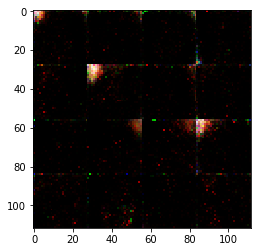

Epoch 1/1... Discriminator Loss: 1.0556... Generator Loss: 1.0059
Epoch 1/1... Discriminator Loss: 0.5440... Generator Loss: 1.9141
Epoch 1/1... Discriminator Loss: 0.6490... Generator Loss: 1.2460
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 1.1149
Epoch 1/1... Discriminator Loss: 0.7010... Generator Loss: 2.2212


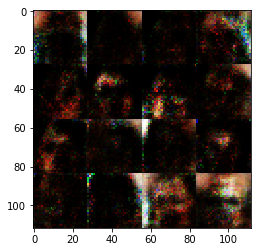

Epoch 1/1... Discriminator Loss: 1.8445... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 0.9813... Generator Loss: 1.2519
Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 1.0196
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 0.7758


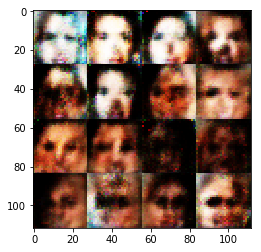

Epoch 1/1... Discriminator Loss: 0.9454... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 1.3696... Generator Loss: 0.7203
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 1.6625
Epoch 1/1... Discriminator Loss: 1.6588... Generator Loss: 0.9542
Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.8439


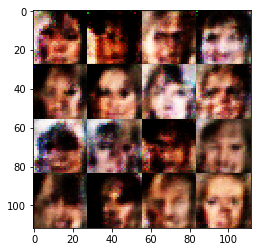

Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 1.0491... Generator Loss: 1.6546
Epoch 1/1... Discriminator Loss: 1.2314... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.6292... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.0510... Generator Loss: 1.0360


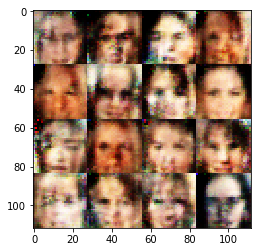

Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.1888
Epoch 1/1... Discriminator Loss: 2.0127... Generator Loss: 0.4142
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.8713
Epoch 1/1... Discriminator Loss: 1.1208... Generator Loss: 1.0348


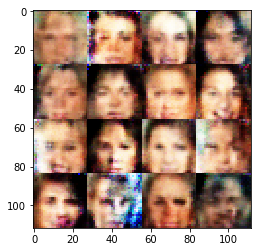

Epoch 1/1... Discriminator Loss: 1.5942... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.7953... Generator Loss: 0.8197
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 0.7549
Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.9233


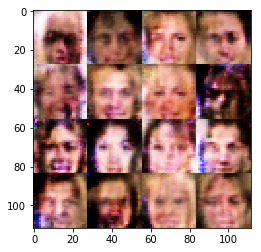

Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 0.9789
Epoch 1/1... Discriminator Loss: 0.7950... Generator Loss: 1.3043
Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 1.2301
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 1.0321
Epoch 1/1... Discriminator Loss: 0.6995... Generator Loss: 1.3029


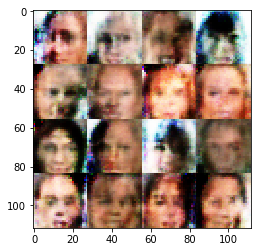

Epoch 1/1... Discriminator Loss: 0.9645... Generator Loss: 0.9735
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.9066
Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 0.9739
Epoch 1/1... Discriminator Loss: 0.9015... Generator Loss: 1.0497
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 1.0266


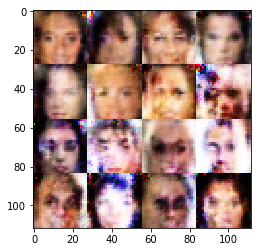

Epoch 1/1... Discriminator Loss: 1.2792... Generator Loss: 0.4038
Epoch 1/1... Discriminator Loss: 0.9463... Generator Loss: 1.1669
Epoch 1/1... Discriminator Loss: 1.3327... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.8376
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.9580


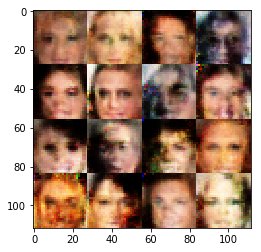

Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 0.8696... Generator Loss: 1.4163
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 1.1374
Epoch 1/1... Discriminator Loss: 0.8844... Generator Loss: 1.9883
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 1.0982


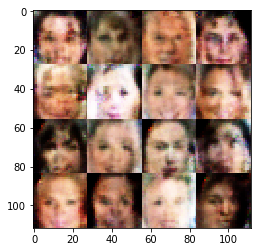

Epoch 1/1... Discriminator Loss: 1.9273... Generator Loss: 0.5249
Epoch 1/1... Discriminator Loss: 1.0743... Generator Loss: 1.0172
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.5464
Epoch 1/1... Discriminator Loss: 0.8121... Generator Loss: 0.9262
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 0.6722


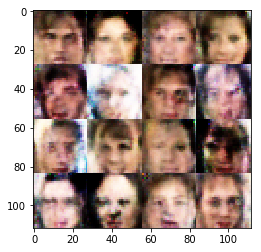

Epoch 1/1... Discriminator Loss: 1.5377... Generator Loss: 0.7430
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 0.7223
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 1.3109
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 0.7797


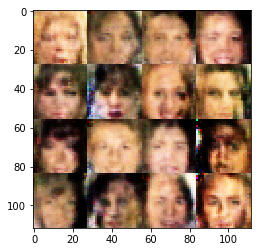

Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 1.1635
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 1.1779... Generator Loss: 0.5178
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 1.2904
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.5661


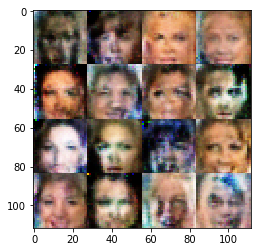

Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.1489... Generator Loss: 0.6389
Epoch 1/1... Discriminator Loss: 1.2198... Generator Loss: 0.6136
Epoch 1/1... Discriminator Loss: 1.0299... Generator Loss: 1.4568
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.8299


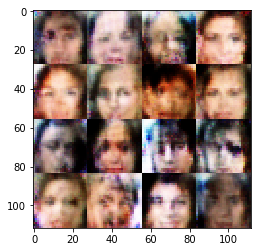

Epoch 1/1... Discriminator Loss: 1.5345... Generator Loss: 0.8574
Epoch 1/1... Discriminator Loss: 0.9363... Generator Loss: 1.0005
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.7107


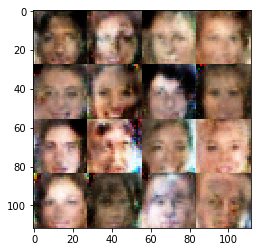

Epoch 1/1... Discriminator Loss: 0.8801... Generator Loss: 1.1566
Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.6298
Epoch 1/1... Discriminator Loss: 1.1626... Generator Loss: 0.9943
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.7350


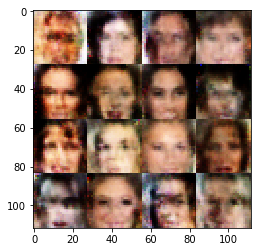

Epoch 1/1... Discriminator Loss: 0.9306... Generator Loss: 1.2332
Epoch 1/1... Discriminator Loss: 1.0604... Generator Loss: 1.3932
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.7345
Epoch 1/1... Discriminator Loss: 1.1154... Generator Loss: 1.1472
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 0.7806


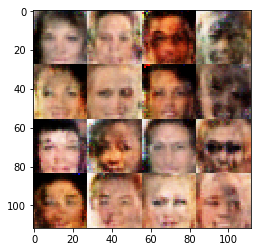

Epoch 1/1... Discriminator Loss: 1.7137... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.4981... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.2065... Generator Loss: 0.8757
Epoch 1/1... Discriminator Loss: 1.5633... Generator Loss: 0.5327


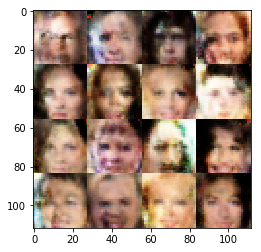

Epoch 1/1... Discriminator Loss: 1.5682... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.5175... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.8049... Generator Loss: 0.4861
Epoch 1/1... Discriminator Loss: 1.7650... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.7612


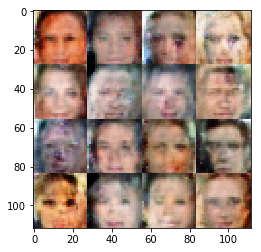

Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.5898
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 1.0256
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.7351
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 1.2002
Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 0.7098


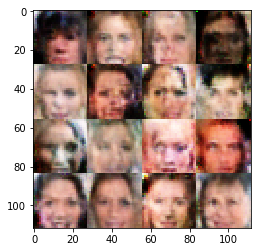

Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 1.0935
Epoch 1/1... Discriminator Loss: 1.4570... Generator Loss: 0.8572
Epoch 1/1... Discriminator Loss: 1.5219... Generator Loss: 0.5328
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 0.8142


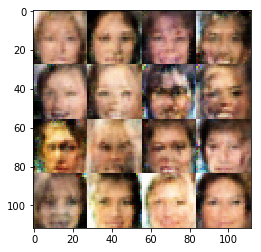

Epoch 1/1... Discriminator Loss: 1.7639... Generator Loss: 0.8350
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.5112
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 1.1229... Generator Loss: 1.0690
Epoch 1/1... Discriminator Loss: 1.7133... Generator Loss: 0.7459


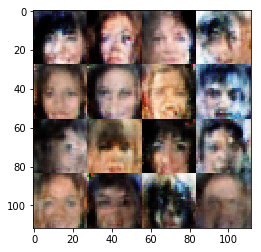

Epoch 1/1... Discriminator Loss: 1.4589... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 1.7125... Generator Loss: 0.4321
Epoch 1/1... Discriminator Loss: 1.5070... Generator Loss: 0.9958
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.7199


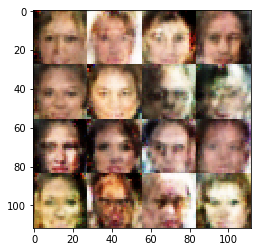

Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.7577
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 0.8383
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.9813
Epoch 1/1... Discriminator Loss: 1.7035... Generator Loss: 0.5365
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.8334


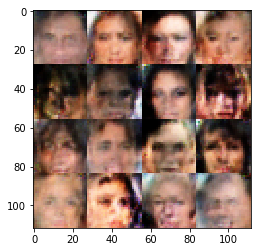

Epoch 1/1... Discriminator Loss: 1.1459... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 1.1303
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.8018
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 1.0103


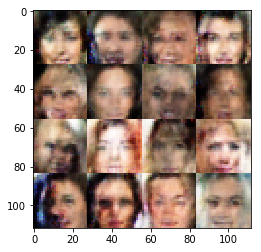

Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.5927
Epoch 1/1... Discriminator Loss: 1.5016... Generator Loss: 0.7077
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.6482


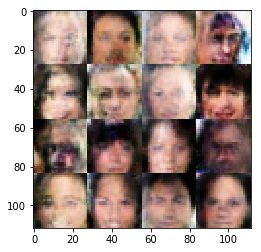

Epoch 1/1... Discriminator Loss: 1.5797... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 0.5093
Epoch 1/1... Discriminator Loss: 1.5890... Generator Loss: 0.6764


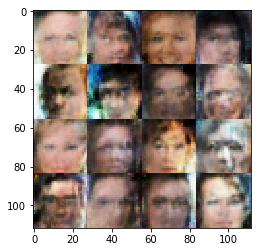

Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.5830... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 1.4844... Generator Loss: 0.6630


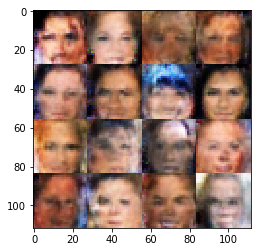

Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 0.9455
Epoch 1/1... Discriminator Loss: 1.7918... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.9268... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.6707


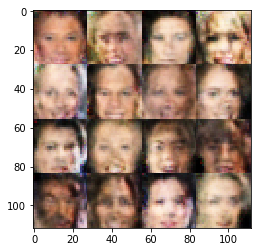

Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.5504... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.4593... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.8931... Generator Loss: 0.4709
Epoch 1/1... Discriminator Loss: 1.1726... Generator Loss: 0.8258


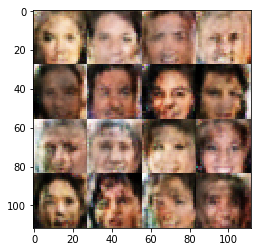

Epoch 1/1... Discriminator Loss: 1.4900... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.4101... Generator Loss: 0.8439
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6177
Epoch 1/1... Discriminator Loss: 1.5432... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.5641... Generator Loss: 0.7864


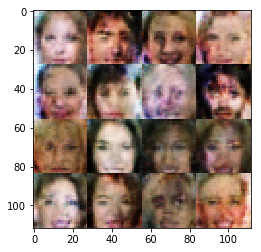

Epoch 1/1... Discriminator Loss: 1.5936... Generator Loss: 0.6166
Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.4594... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.7046... Generator Loss: 0.5691
Epoch 1/1... Discriminator Loss: 1.7074... Generator Loss: 0.4783


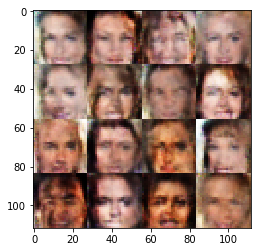

Epoch 1/1... Discriminator Loss: 1.2689... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.5385... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.5901... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.5872... Generator Loss: 0.5369
Epoch 1/1... Discriminator Loss: 1.4098... Generator Loss: 0.6994


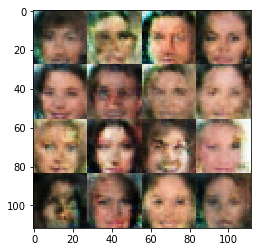

Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 1.6520... Generator Loss: 0.5453
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.5480
Epoch 1/1... Discriminator Loss: 1.7080... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.2388... Generator Loss: 0.8122


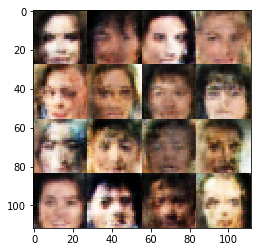

Epoch 1/1... Discriminator Loss: 1.4513... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.5786... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.6521... Generator Loss: 0.7685
Epoch 1/1... Discriminator Loss: 1.6315... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.4853... Generator Loss: 0.8702


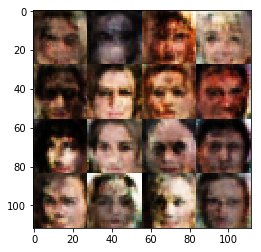

Epoch 1/1... Discriminator Loss: 1.6725... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.6032... Generator Loss: 0.6411
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.6199
Epoch 1/1... Discriminator Loss: 1.4225... Generator Loss: 0.6133


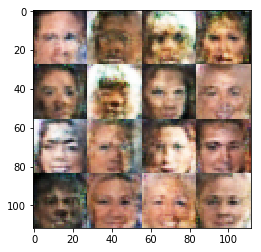

Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 0.7846
Epoch 1/1... Discriminator Loss: 1.6020... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.9625... Generator Loss: 0.6089
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.6566


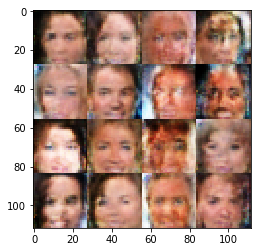

Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.5259... Generator Loss: 0.7651
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 1.6864... Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.3535... Generator Loss: 0.7248


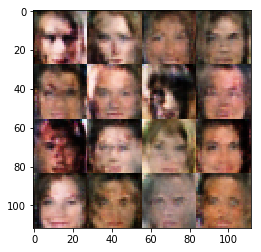

Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 1.1386... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.6248... Generator Loss: 0.4681
Epoch 1/1... Discriminator Loss: 1.4973... Generator Loss: 0.7170
Epoch 1/1... Discriminator Loss: 1.7870... Generator Loss: 0.4913


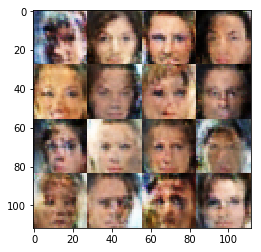

Epoch 1/1... Discriminator Loss: 1.2331... Generator Loss: 0.8465
Epoch 1/1... Discriminator Loss: 1.4798... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.5228... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.5854... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.5647... Generator Loss: 0.6532


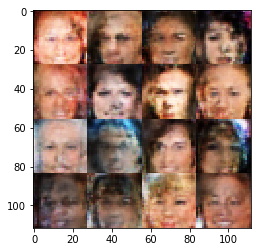

Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 1.4729... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.7114
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.6201


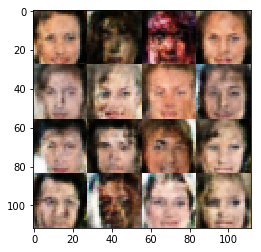

Epoch 1/1... Discriminator Loss: 1.5157... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.5924... Generator Loss: 0.6095
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.4276... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.6992


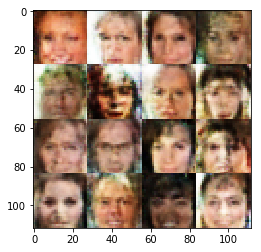

Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.4982... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.4972


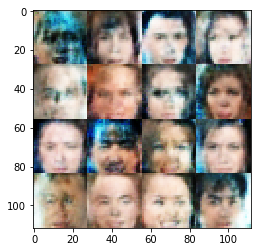

Epoch 1/1... Discriminator Loss: 1.5046... Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.6244... Generator Loss: 0.4906
Epoch 1/1... Discriminator Loss: 1.6201... Generator Loss: 0.5644


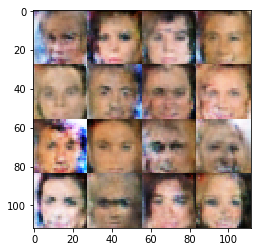

Epoch 1/1... Discriminator Loss: 1.6408... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.4955... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 1.5460... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.6011


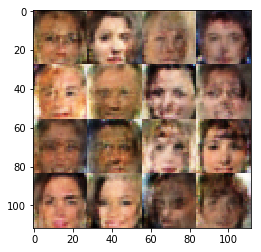

Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.5552... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.4897... Generator Loss: 0.6641


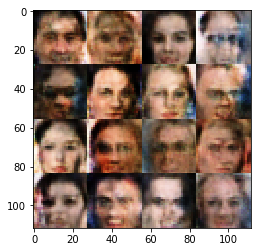

Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.7123... Generator Loss: 0.5366


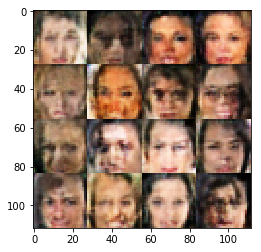

Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.5844... Generator Loss: 0.5744
Epoch 1/1... Discriminator Loss: 1.3121... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.5206... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.4166... Generator Loss: 0.7254


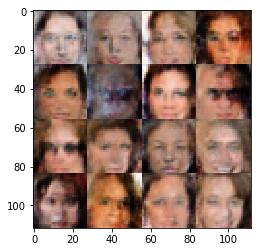

Epoch 1/1... Discriminator Loss: 1.5275... Generator Loss: 0.7521
Epoch 1/1... Discriminator Loss: 1.5011... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.6894


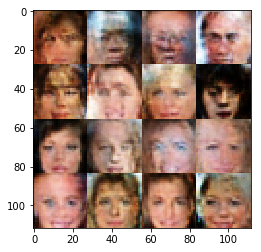

Epoch 1/1... Discriminator Loss: 1.5228... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.4994... Generator Loss: 0.7046
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.6374
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.7702


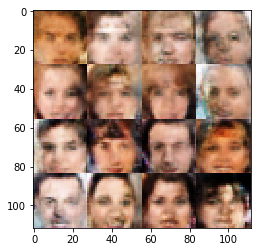

Epoch 1/1... Discriminator Loss: 1.5957... Generator Loss: 0.6025
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.5877... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.6034
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.7346


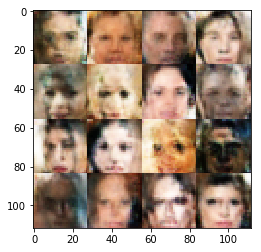

Epoch 1/1... Discriminator Loss: 1.5161... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.5282... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.6493... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.5074... Generator Loss: 0.6492


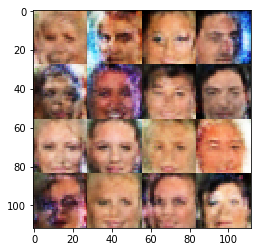

Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.5623... Generator Loss: 0.6237
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.4830... Generator Loss: 0.7255


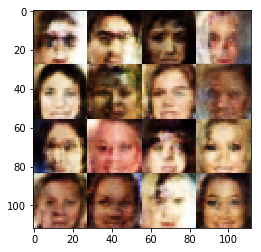

Epoch 1/1... Discriminator Loss: 1.5432... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4511... Generator Loss: 0.5566
Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.5328... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.7350


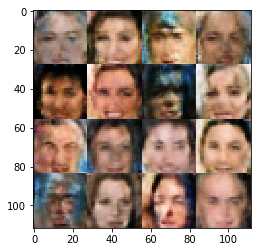

Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 0.5280
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.7041


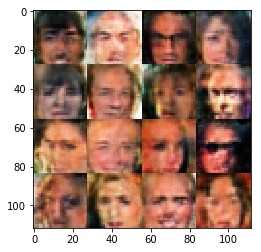

Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.5861
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.6976
Epoch 1/1... Discriminator Loss: 1.5283... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.3630... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.5278... Generator Loss: 0.6787


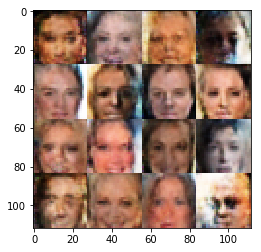

Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.5394
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 1.5841... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.5466... Generator Loss: 0.7502


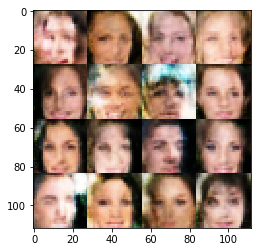

Epoch 1/1... Discriminator Loss: 1.7332... Generator Loss: 0.5271
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.6593
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.7649


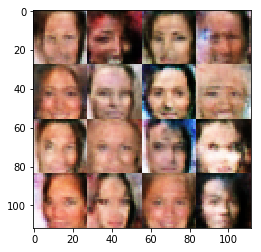

Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.5094... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.7560


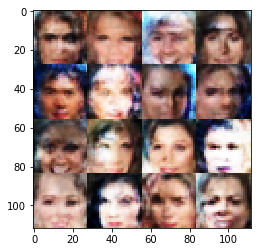

Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.7126
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 0.6406
Epoch 1/1... Discriminator Loss: 1.4679... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.4502... Generator Loss: 0.7120


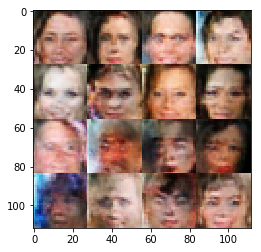

Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.5068... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.5356... Generator Loss: 0.6162


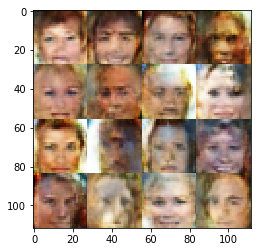

Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.7217
Epoch 1/1... Discriminator Loss: 1.5522... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.5785


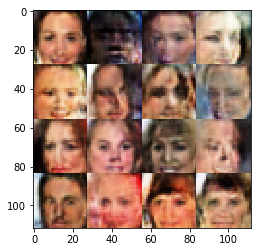

Epoch 1/1... Discriminator Loss: 1.4738... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.5199... Generator Loss: 0.5685
Epoch 1/1... Discriminator Loss: 1.5382... Generator Loss: 0.6281
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.6188
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.6825


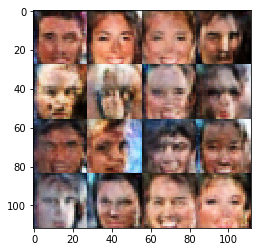

Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.3295... Generator Loss: 0.6964
Epoch 1/1... Discriminator Loss: 1.4941... Generator Loss: 0.6354
Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.6724


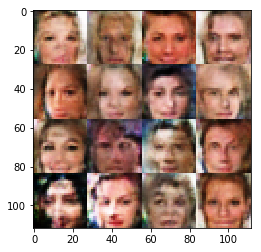

Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.7033


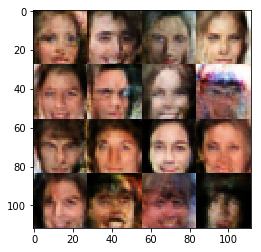

Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6830


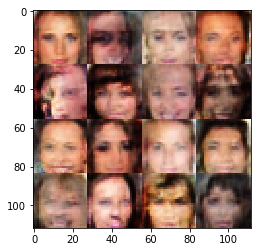

Epoch 1/1... Discriminator Loss: 1.5500... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.6281


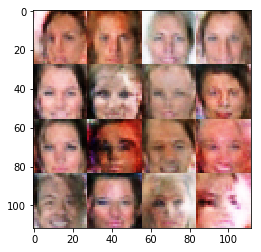

Epoch 1/1... Discriminator Loss: 1.4853... Generator Loss: 0.6096
Epoch 1/1... Discriminator Loss: 1.4721... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.7027... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.4439... Generator Loss: 0.5611
Epoch 1/1... Discriminator Loss: 1.5474... Generator Loss: 0.6472


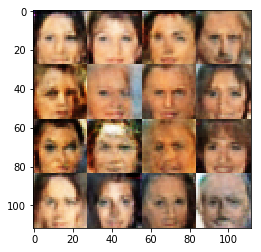

Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.8047
Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.6010
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.7503


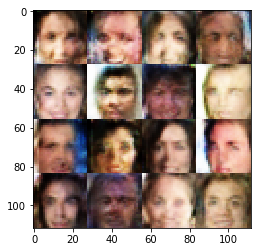

Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.6541


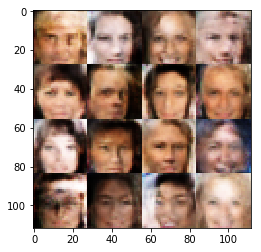

Epoch 1/1... Discriminator Loss: 1.5040... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.4453... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.5244... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.5414... Generator Loss: 0.5563


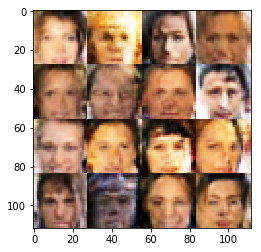

Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 1.4872... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.5473
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.5878


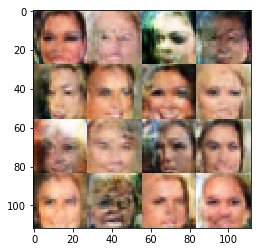

Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.5429... Generator Loss: 0.6122
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.7137


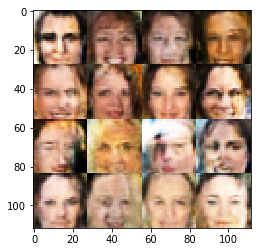

Epoch 1/1... Discriminator Loss: 1.5509... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.5120... Generator Loss: 0.6439
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.7166
Epoch 1/1... Discriminator Loss: 1.4764... Generator Loss: 0.5377


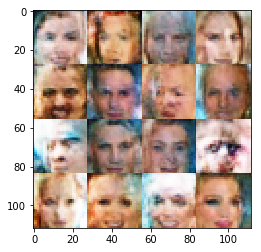

Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 0.7078
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 1.2804... Generator Loss: 0.7186


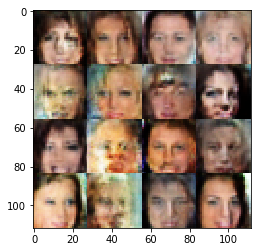

Epoch 1/1... Discriminator Loss: 1.4166... Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 1.5046... Generator Loss: 0.5896
Epoch 1/1... Discriminator Loss: 1.5140... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.5196... Generator Loss: 0.5865
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6503


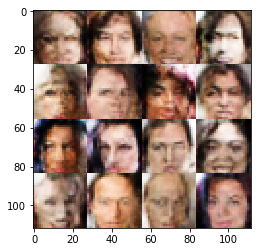

Epoch 1/1... Discriminator Loss: 1.5761... Generator Loss: 0.5459
Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.4650... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6373


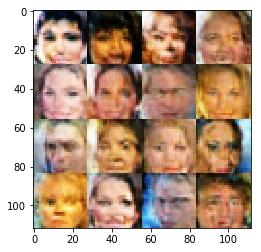

Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.5025... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 1.5346... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.6524


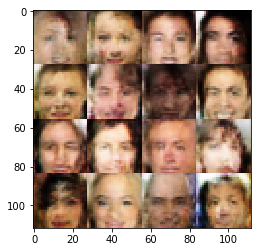

Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.6495
Epoch 1/1... Discriminator Loss: 1.5923... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.6839


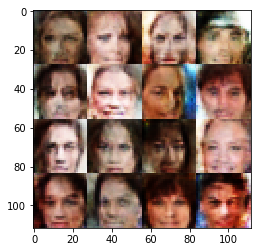

Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.7679
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.7118
Epoch 1/1... Discriminator Loss: 1.4940... Generator Loss: 0.6216
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.6138
Epoch 1/1... Discriminator Loss: 1.3596... Generator Loss: 0.6572


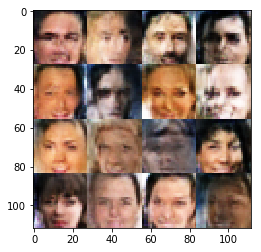

Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.7549
Epoch 1/1... Discriminator Loss: 1.5313... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.5267... Generator Loss: 0.6238


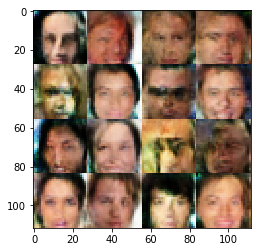

Epoch 1/1... Discriminator Loss: 1.4795... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.5488... Generator Loss: 0.5604
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.7466


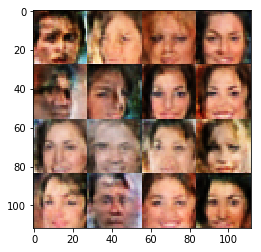

Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.5302... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.4532... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.7321
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.6825


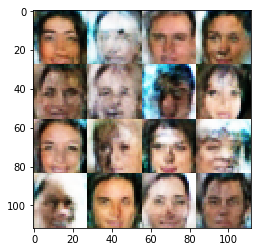

Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.4124... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.6931


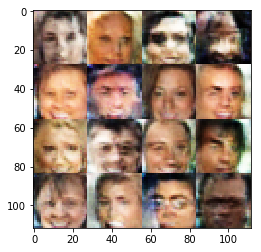

Epoch 1/1... Discriminator Loss: 1.5058... Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 1.4188... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.4760... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.7080


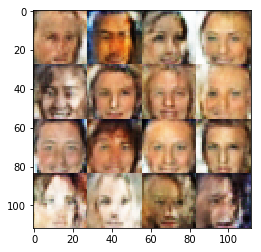

Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 1.3272... Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.6179


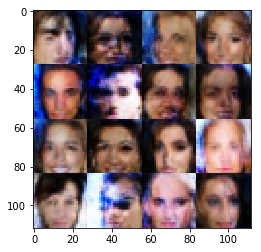

Epoch 1/1... Discriminator Loss: 1.5364... Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.7524


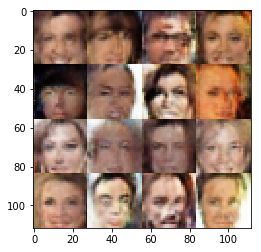

Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.6122
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.6853


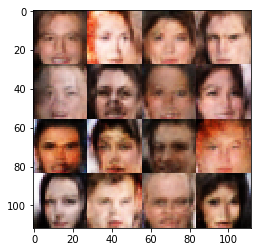

Epoch 1/1... Discriminator Loss: 1.5152... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.4690... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.4929... Generator Loss: 0.6166
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.7230


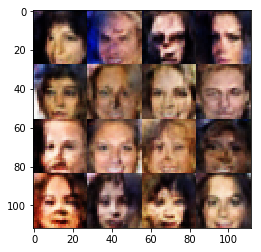

Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.5188... Generator Loss: 0.5632
Epoch 1/1... Discriminator Loss: 1.5040... Generator Loss: 0.6165


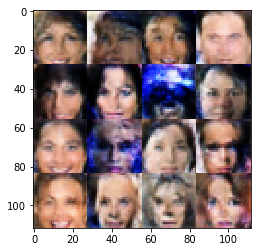

Epoch 1/1... Discriminator Loss: 1.4681... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.6708
Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.6885


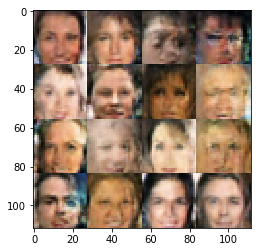

Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.6228
Epoch 1/1... Discriminator Loss: 1.5238... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 0.6862


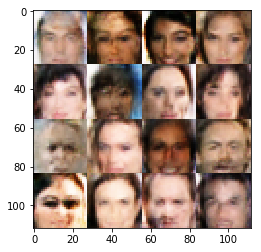

Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.5862
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.6085
Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.7081
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.7079


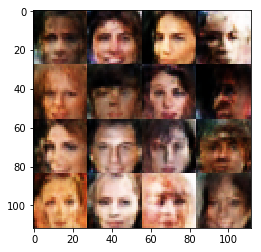

Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 1.4954... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.6496


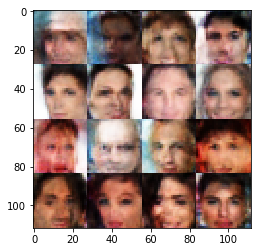

Epoch 1/1... Discriminator Loss: 1.4327... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4596... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.7759


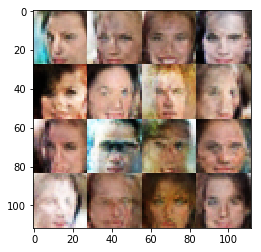

Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.4803... Generator Loss: 0.6458
Epoch 1/1... Discriminator Loss: 1.4763... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.7021


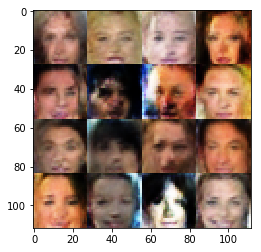

Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 1.4178... Generator Loss: 0.6141
Epoch 1/1... Discriminator Loss: 1.6147... Generator Loss: 0.5889
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.6737


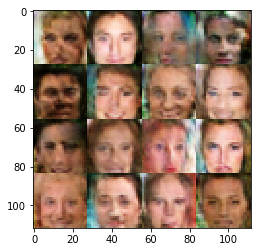

Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 0.6774


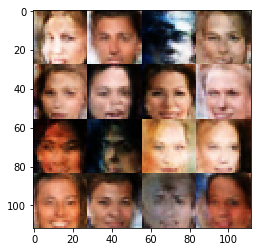

Epoch 1/1... Discriminator Loss: 1.5409... Generator Loss: 0.6105
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 1.4684... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.5026... Generator Loss: 0.5693


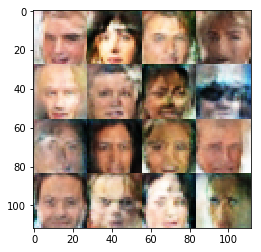

Epoch 1/1... Discriminator Loss: 1.5245... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.7139
Epoch 1/1... Discriminator Loss: 1.5603... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.6498


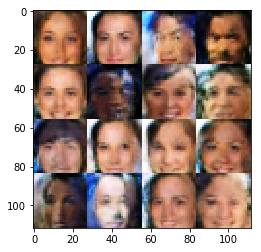

Epoch 1/1... Discriminator Loss: 1.4651... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.5690
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.7139


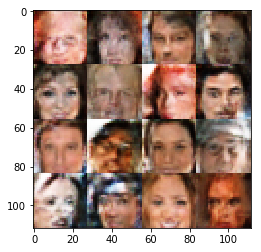

Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.6335


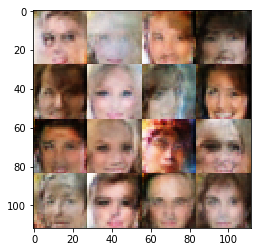

Epoch 1/1... Discriminator Loss: 1.4996... Generator Loss: 0.6114
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.6881


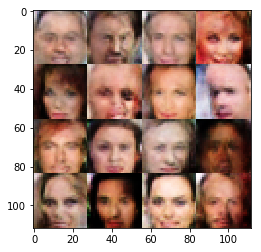

Epoch 1/1... Discriminator Loss: 1.4375... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.7241
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 1.5028... Generator Loss: 0.6579
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.6899


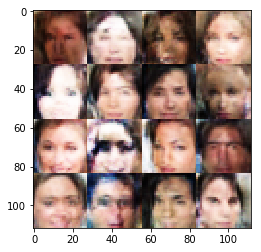

Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.5459... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.5355... Generator Loss: 0.5373
Epoch 1/1... Discriminator Loss: 1.4797... Generator Loss: 0.6369


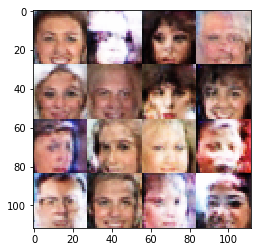

Epoch 1/1... Discriminator Loss: 1.5095... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.4513... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.6436
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.6359


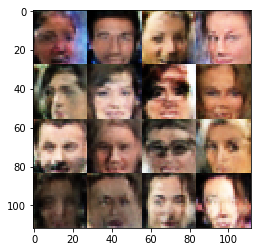

Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.4780... Generator Loss: 0.6239
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.7604


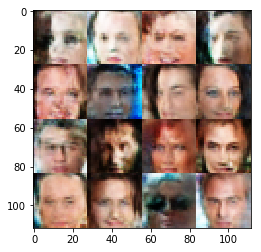

Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.5125... Generator Loss: 0.6390
Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.6643
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.7026


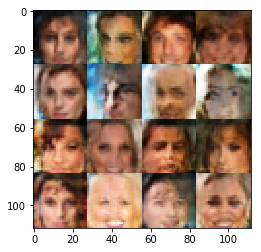

Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.6516


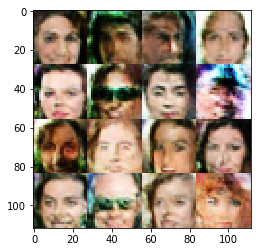

Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.7238
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.4875... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.5480... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.6534


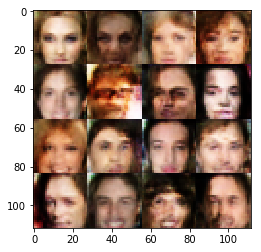

Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.5096... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.6646


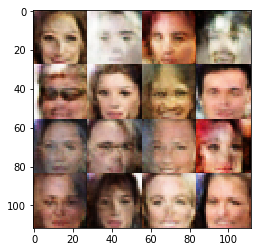

Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.4673... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.5816


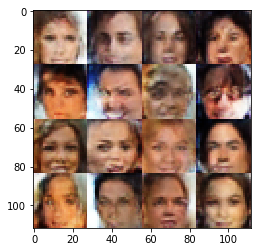

Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.6696


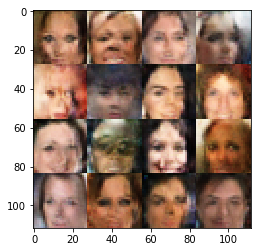

Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.4836... Generator Loss: 0.6012
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.6267


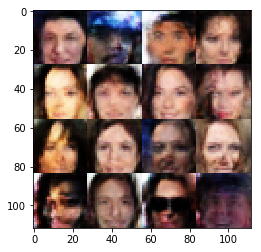

Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.4971... Generator Loss: 0.5753


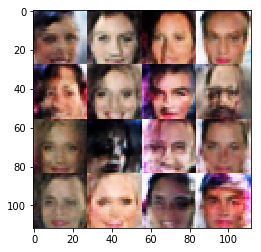

Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.6969


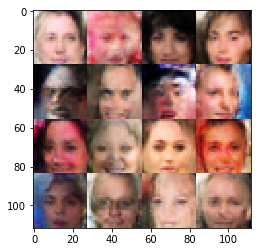

Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.5233... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.6632


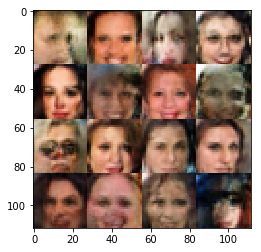

Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.6390
Epoch 1/1... Discriminator Loss: 1.4074... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.6422
Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.5775


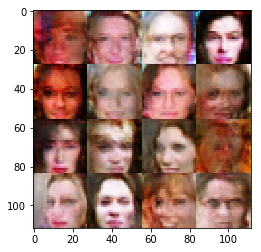

Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.5877
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.7322


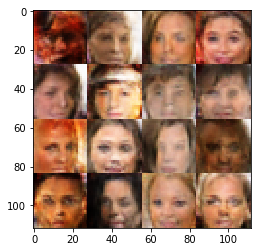

Epoch 1/1... Discriminator Loss: 1.4973... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.3318... Generator Loss: 0.6173
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.6282


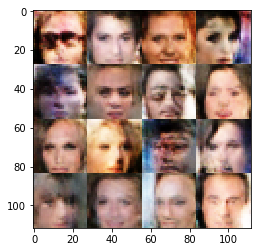

Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.6463
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.6873


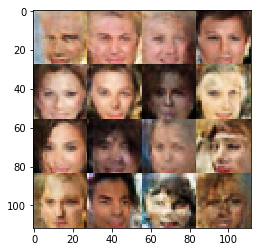

Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.6024
Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 1.2738... Generator Loss: 0.6465


In [78]:
batch_size = 16
z_dim = 128
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.